In [1]:
#!pip install patsy
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.head()

,Country,LifeExpectancy,Population,Status,Area (km²),BirthRate,GDP(US$mil),EPIScore,HealthExpenditure$,CancerRate,HeartDiseaseRate,StrokeRate
0,JAPAN,84.3,126226568,Developed,377972.0,7.3,5082465,75.1,4504.0,102.84,31.55,25.76
1,SOUTH KOREA,84.0,51683025,NaN,100210.0,8.2,1646539,66.5,3214.0,102.53,30.29,32.37
2,SWITZERLAND,83.3,8680890,Developed,41285.0,10.5,731425,81.5,8114.0,102.46,47.47,15.26
3,SINGAPORE,83.2,5685807,Developed,721.5,8.9,372073,58.1,4439.0,99.90,54.67,25.53
4,SPAIN,83.2,47351567,Developed,505990.0,8.7,1393490,74.3,3576.0,107.58,38.88,19.39


In [4]:
df.shape

(173, 12)

We have details of 173 countries with 10 attributes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             173 non-null    object 
 1   LifeExpectancy      173 non-null    float64
 2   Population          173 non-null    int64  
 3   Status              165 non-null    object 
 4   Area (km²)          145 non-null    float64
 5   BirthRate           170 non-null    float64
 6   GDP(US$mil)         173 non-null    int64  
 7   EPIScore            167 non-null    float64
 8   HealthExpenditure$  167 non-null    float64
 9   CancerRate          161 non-null    float64
 10  HeartDiseaseRate    161 non-null    float64
 11  StrokeRate          161 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 16.3+ KB


In [6]:
df.describe()

,LifeExpectancy,Population,Area (km²),BirthRate,GDP(US$mil),EPIScore,HealthExpenditure$,CancerRate,HeartDiseaseRate,StrokeRate
count,173.000000,1.730000e+02,1.450000e+02,170.000000,1.730000e+02,167.000000,167.000000,161.000000,161.000000,161.000000
mean,72.722543,4.303517e+07,7.756852e+05,19.445294,4.864974e+05,46.822156,1620.167665,110.581739,138.868634,72.798696
std,7.171310,1.544801e+08,1.705212e+06,9.667123,2.040039e+06,15.583651,2048.181764,27.039614,77.873438,41.096690
min,50.700000,9.896300e+04,7.215000e+02,7.300000,1.940000e+02,22.600000,66.000000,57.540000,30.290000,14.600000
25%,66.700000,2.786006e+06,7.027300e+04,11.900000,1.252000e+04,34.550000,260.500000,90.410000,75.740000,36.570000
50%,73.900000,9.730000e+06,2.424950e+05,16.800000,3.886100e+04,44.300000,784.000000,109.410000,120.290000,65.640000
75%,77.900000,3.095520e+07,7.108500e+05,23.750000,2.500750e+05,55.250000,2057.500000,126.840000,181.770000,106.510000
max,84.300000,1.411779e+09,9.984670e+06,47.500000,2.143323e+07,82.500000,12643.000000,210.720000,379.030000,171.220000


In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Status                 8
Area (km²)            28
BirthRate              3
EPIScore               6
HealthExpenditure$     6
CancerRate            12
HeartDiseaseRate      12
StrokeRate            12
dtype: int64

Details of few countries are missing. Instead of dropping these records, I will go back to the scraping part and correct the data as there are only few missing details.

In [8]:
df[df.isnull().any(axis=1)]

,Country,LifeExpectancy,Population,Status,Area (km²),BirthRate,GDP(US$mil),EPIScore,HealthExpenditure$,CancerRate,HeartDiseaseRate,StrokeRate
1,SOUTH KOREA,84.0,51683025,NaN,100210.0,8.2,1646539,66.5,3214.0,102.53,30.29,32.37
5,CYPRUS,83.1,888005,Developed,NaN,10.9,24565,64.8,2625.0,108.29,78.70,27.77
11,LUXEMBOURG,82.4,634730,Developed,NaN,11.6,71104,82.3,6048.0,113.60,49.00,19.70
13,ICELAND,82.3,369870,Developed,NaN,13.3,24188,72.3,5113.0,116.12,62.55,19.96
16,MALTA,81.9,514564,Developed,NaN,9.9,14863,70.7,3897.0,110.29,92.82,29.20
32,MALDIVES,79.6,383135,Developing,NaN,16.0,5642,35.6,1443.0,86.17,137.02,36.57
53,BOSNIA AND HERZEGOVINA,76.8,3320954,Developing,51129.0,8.6,20164,45.4,1301.0,NaN,NaN,NaN
55,ANTIGUA AND BARBUDA,76.5,99337,Developing,NaN,15.4,1661,48.5,1406.0,NaN,NaN,NaN
58,TRINIDAD AND TOBAGO,76.1,1366725,Developing,5131.0,11.4,23208,47.5,2100.0,NaN,NaN,NaN
59,UNITED ARAB EMIRATES,76.1,9503738,Developing,83600.0,9.5,421142,55.6,3173.0,NaN,NaN,NaN


In [9]:
# replace null field in each column by mean of column values
df['Area (km²)'].fillna(df['Area (km²)'].mean(), inplace=True)
df['BirthRate'].fillna(df['BirthRate'].mean(), inplace=True)
df['EPIScore'].fillna(df['EPIScore'].mean(), inplace=True)
df['HealthExpenditure$'].fillna(df['HealthExpenditure$'].mean(), inplace=True)
df['CancerRate'].fillna(df['CancerRate'].mean(), inplace=True)
df['HeartDiseaseRate'].fillna(df['HeartDiseaseRate'].mean(), inplace=True)
df['StrokeRate'].fillna(df['StrokeRate'].mean(), inplace=True)

In [10]:
df.columns[df.isnull().any()]

Index(['Status'], dtype='object')

In [11]:
df1=df

In [12]:
df.to_csv('orig.csv')

###### EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             173 non-null    object 
 1   LifeExpectancy      173 non-null    float64
 2   Population          173 non-null    int64  
 3   Status              165 non-null    object 
 4   Area (km²)          173 non-null    float64
 5   BirthRate           173 non-null    float64
 6   GDP(US$mil)         173 non-null    int64  
 7   EPIScore            173 non-null    float64
 8   HealthExpenditure$  173 non-null    float64
 9   CancerRate          173 non-null    float64
 10  HeartDiseaseRate    173 non-null    float64
 11  StrokeRate          173 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 16.3+ KB


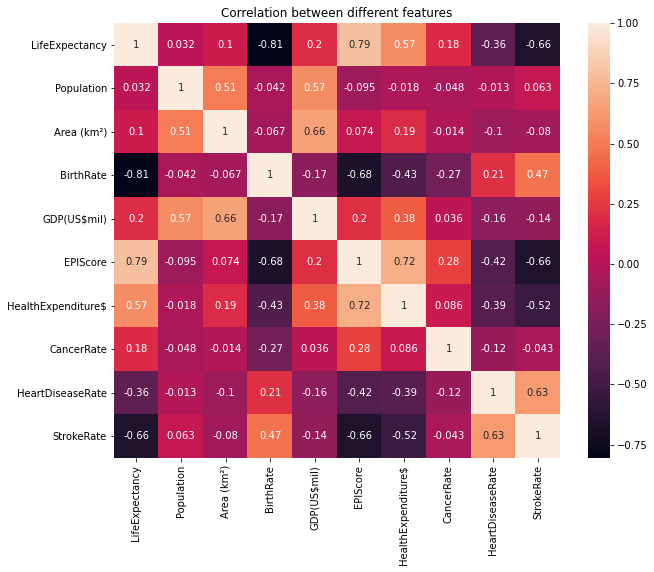

In [14]:
# Plot heatmap to visualize the correlations.
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation between different features');

In [15]:
df.corr()

,LifeExpectancy,Population,Area (km²),BirthRate,GDP(US$mil),EPIScore,HealthExpenditure$,CancerRate,HeartDiseaseRate,StrokeRate
LifeExpectancy,1.000000,0.031902,0.103394,-0.805599,0.198050,0.792191,0.572307,0.182899,-0.361162,-0.657613
Population,0.031902,1.000000,0.510776,-0.042293,0.572841,-0.095293,-0.018390,-0.047677,-0.013469,0.062984
Area (km²),0.103394,0.510776,1.000000,-0.067401,0.656180,0.073527,0.190143,-0.014071,-0.100613,-0.080142
BirthRate,-0.805599,-0.042293,-0.067401,1.000000,-0.174087,-0.678443,-0.425924,-0.272680,0.211742,0.467916
GDP(US$mil),0.198050,0.572841,0.656180,-0.174087,1.000000,0.204153,0.379465,0.036166,-0.159533,-0.139187
EPIScore,0.792191,-0.095293,0.073527,-0.678443,0.204153,1.000000,0.716118,0.275476,-0.419341,-0.659486
HealthExpenditure$,0.572307,-0.018390,0.190143,-0.425924,0.379465,0.716118,1.000000,0.086265,-0.389455,-0.523961
CancerRate,0.182899,-0.047677,-0.014071,-0.272680,0.036166,0.275476,0.086265,1.000000,-0.120596,-0.043381
HeartDiseaseRate,-0.361162,-0.013469,-0.100613,0.211742,-0.159533,-0.419341,-0.389455,-0.120596,1.000000,0.629803
StrokeRate,-0.657613,0.062984,-0.080142,0.467916,-0.139187,-0.659486,-0.523961,-0.043381,0.629803,1.000000


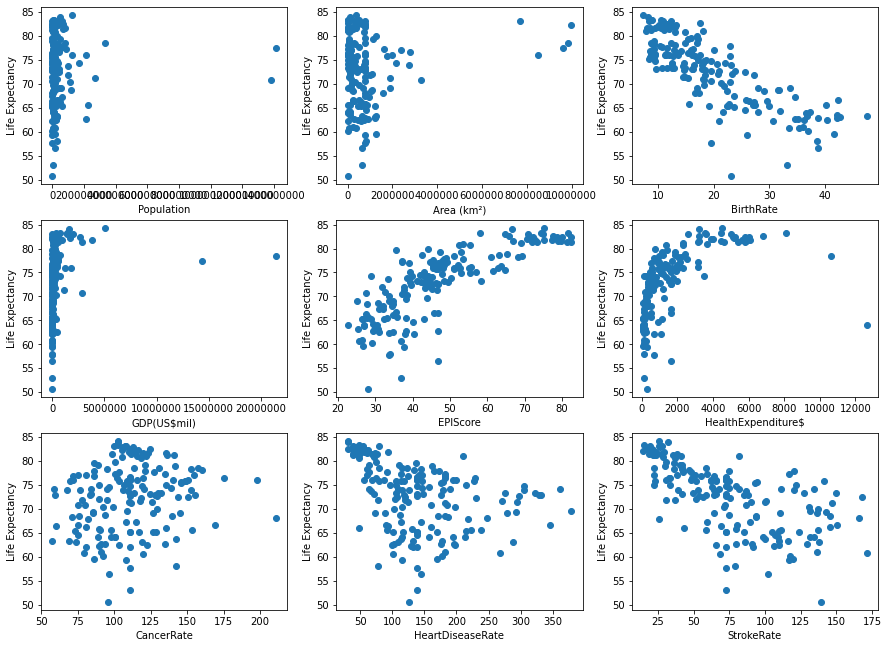

In [16]:
# Create a vector containing all the features of the dataset.
all_col = ['Population','Area (km²)','BirthRate','GDP(US$mil)','EPIScore',
           'HealthExpenditure$','CancerRate','HeartDiseaseRate','StrokeRate']

plt.figure(figsize=(15,15))

# Plot each feature in function of the target variable (life_expectancy) using scatter plots.
for i in range(len(all_col)):
    plt.subplot(4,3,i+1)
    plt.scatter(df[all_col[i]], df['LifeExpectancy'])
    plt.xlabel(all_col[i])
    plt.ylabel('Life Expectancy')
    plt.ticklabel_format(axis="x", style="plain", scilimits=None)

plt.show()


In [17]:
import statsmodels.api as sm

In [18]:
# slice data into features X and target y
X = df[ ['Population','Area (km²)','BirthRate','GDP(US$mil)','EPIScore',
         'HealthExpenditure$','CancerRate','HeartDiseaseRate','StrokeRate'] ].astype(float)
X = sm.add_constant(X)

y = df[ "LifeExpectancy" ].astype(float)    # y is a series
# y = df.loc[:,"Life Expectancy"].astype(float)   # alternate code, same outcome

# Baseline results - model / fit / summarize, lots of bad Pvalue>0.05
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     70.55
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.27e-51
Time:                        00:51:19   Log-Likelihood:                -448.41
No. Observations:                 173   AIC:                             916.8
Df Residuals:                     163   BIC:                             948.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 76.2951      2.386     31.979      0.000      71.584      81.006
Population          3.508e-09   2.18e-09      1.607      0.110   -8.04e-10    7.82e-09
Area (km²)          7.303e-08   2.22e-07      0.330      0.742   -3.65e-07    5.11e-07
BirthRate             -0.3635      0.038     -9.653      0.000      -0.438      -0.289
GDP(US$mil)        -1.776e-07   1.97e-07     -0.903      0.368   -5.66e-07    2.11e-07
EPIScore               0.1485      0.033      4.456      0.000       0.083       0.214
HealthExpenditure$     0.0002      0.000      0.944      0.347      -0.000       0.001
CancerRate            -0.0117      0.011     -1.096      0.275      -0.033       0.009
HeartDiseaseRate       0.0023      0.004      0.505      0.614      -0.007       0.011
StrokeRate            -0.0399      0.010     -3.851      0.000      -0.060      -0.019
==============================================================================
Omnibus:                       59.387   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.918
Skew:                          -1.372   Prob(JB):                     3.14e-40
Kurtosis:                       7.209   Cond. No.                     1.51e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Box plot development status and life expectancy

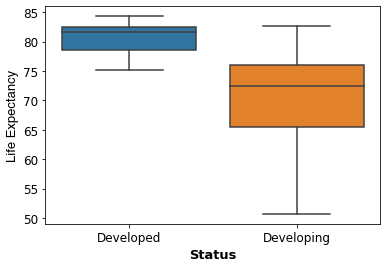

In [19]:
sns.boxplot(x= df["Status"], y= df["LifeExpectancy"],fliersize=5)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
plt.xlabel("Status", fontsize=13, fontweight="bold")
plt.show()

The plot shows developed countries has higher life expectancy rates. It can be argued to be achieved through higher standards of living, more effective health systems, and more resources invested in determinants of health.

Text(0.5, 0, 'Life Expectancy')

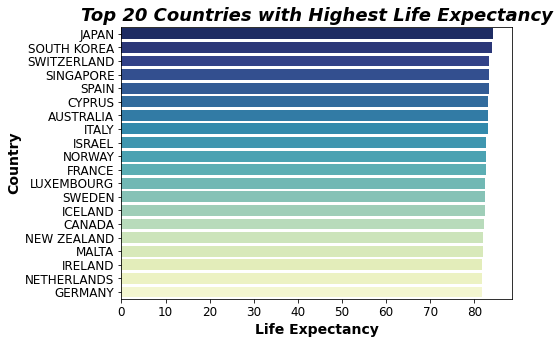

In [20]:
plt.figure(figsize= [7,5])
order= df.groupby("Country").LifeExpectancy.mean().nlargest(20).index
sns.barplot(y= "Country", x= "LifeExpectancy", data= df, order= order, palette= "YlGnBu_r")
plt.title("Top 20 Countries with Highest Life Expectancy", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")

for feature in numerical.columns:
    sns.scatterplot(x= numerical[feature], y= y, hue= categorical.Status)
    plt.xticks(rotation=90, fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
    plt.xlabel(feature, fontsize=13, fontweight="bold")
    plt.show()

Text(0.5, 0, 'Life Expectancy')

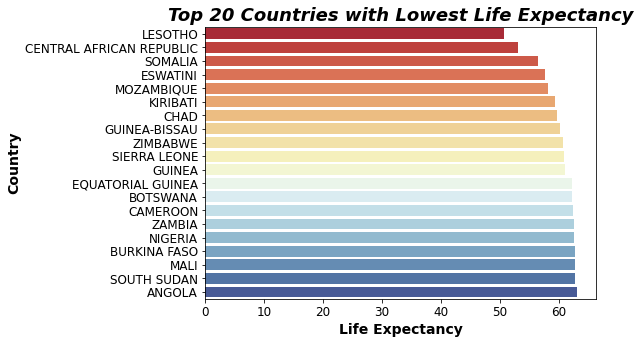

In [21]:
plt.figure(figsize= [7,5])
order=df.groupby("Country").LifeExpectancy.mean().sort_values(ascending= True)[:20].index
sns.barplot(y= "Country", x= "LifeExpectancy", data= df, order= order, palette= "RdYlBu")
plt.title("Top 20 Countries with Lowest Life Expectancy", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")

In [22]:
df.head()

,Country,LifeExpectancy,Population,Status,Area (km²),BirthRate,GDP(US$mil),EPIScore,HealthExpenditure$,CancerRate,HeartDiseaseRate,StrokeRate
0,JAPAN,84.3,126226568,Developed,377972.0,7.3,5082465,75.1,4504.0,102.84,31.55,25.76
1,SOUTH KOREA,84.0,51683025,NaN,100210.0,8.2,1646539,66.5,3214.0,102.53,30.29,32.37
2,SWITZERLAND,83.3,8680890,Developed,41285.0,10.5,731425,81.5,8114.0,102.46,47.47,15.26
3,SINGAPORE,83.2,5685807,Developed,721.5,8.9,372073,58.1,4439.0,99.90,54.67,25.53
4,SPAIN,83.2,47351567,Developed,505990.0,8.7,1393490,74.3,3576.0,107.58,38.88,19.39


Text(0.5, 0, 'Country')

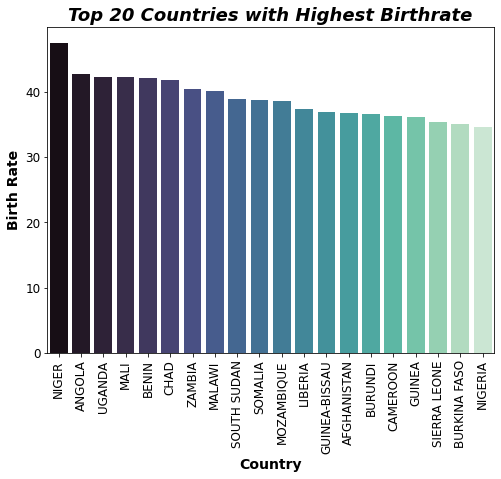

In [23]:
plt.figure(figsize= [8,6])
order= df.groupby("Country").BirthRate.mean().sort_values(ascending= False).head(20).index
sns.barplot(x= "Country", y= "BirthRate", data=df, order=order, errwidth=False, palette="mako")
plt.title("Top 20 Countries with Highest Birthrate", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Birth Rate", fontsize= 14, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontweight="bold")

Text(0.5, 0, 'Country')

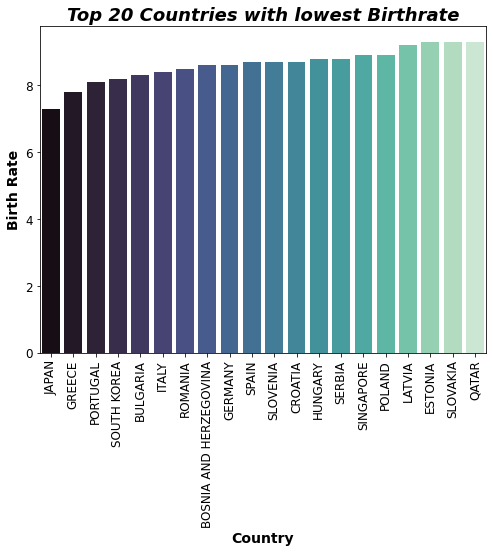

In [24]:
plt.figure(figsize= [8,6])
order= df.groupby("Country").BirthRate.mean().sort_values(ascending= True).head(20).index
sns.barplot(x= "Country", y= "BirthRate", data=df, order=order, errwidth=False, palette="mako")
plt.title("Top 20 Countries with lowest Birthrate", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Birth Rate", fontsize= 14, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontweight="bold")

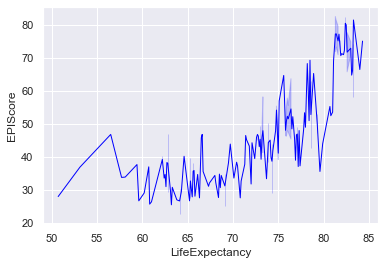

In [25]:
sns.set(style='darkgrid')
sns.lineplot(x='LifeExpectancy', y='EPIScore',lw = 1, data=df, color='blue')
plt.xlabel('LifeExpectancy')
plt.ylabel('EPIScore')
plt.show()


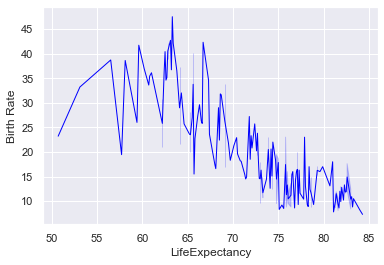

In [26]:
sns.set(style='darkgrid')
sns.lineplot(x='LifeExpectancy', y='BirthRate',lw = 1, data=df, color='blue')
plt.xlabel('LifeExpectancy')
plt.ylabel('Birth Rate')
plt.show()

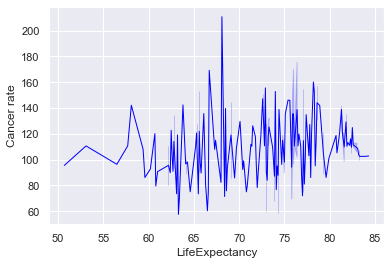

In [27]:
sns.set(style='darkgrid')
sns.lineplot(x='LifeExpectancy', y='CancerRate',lw = 1, data=df, color='blue')
#plt.title("The Beatles Popularity")
plt.xlabel('LifeExpectancy')
plt.ylabel('Cancer rate')
plt.show()



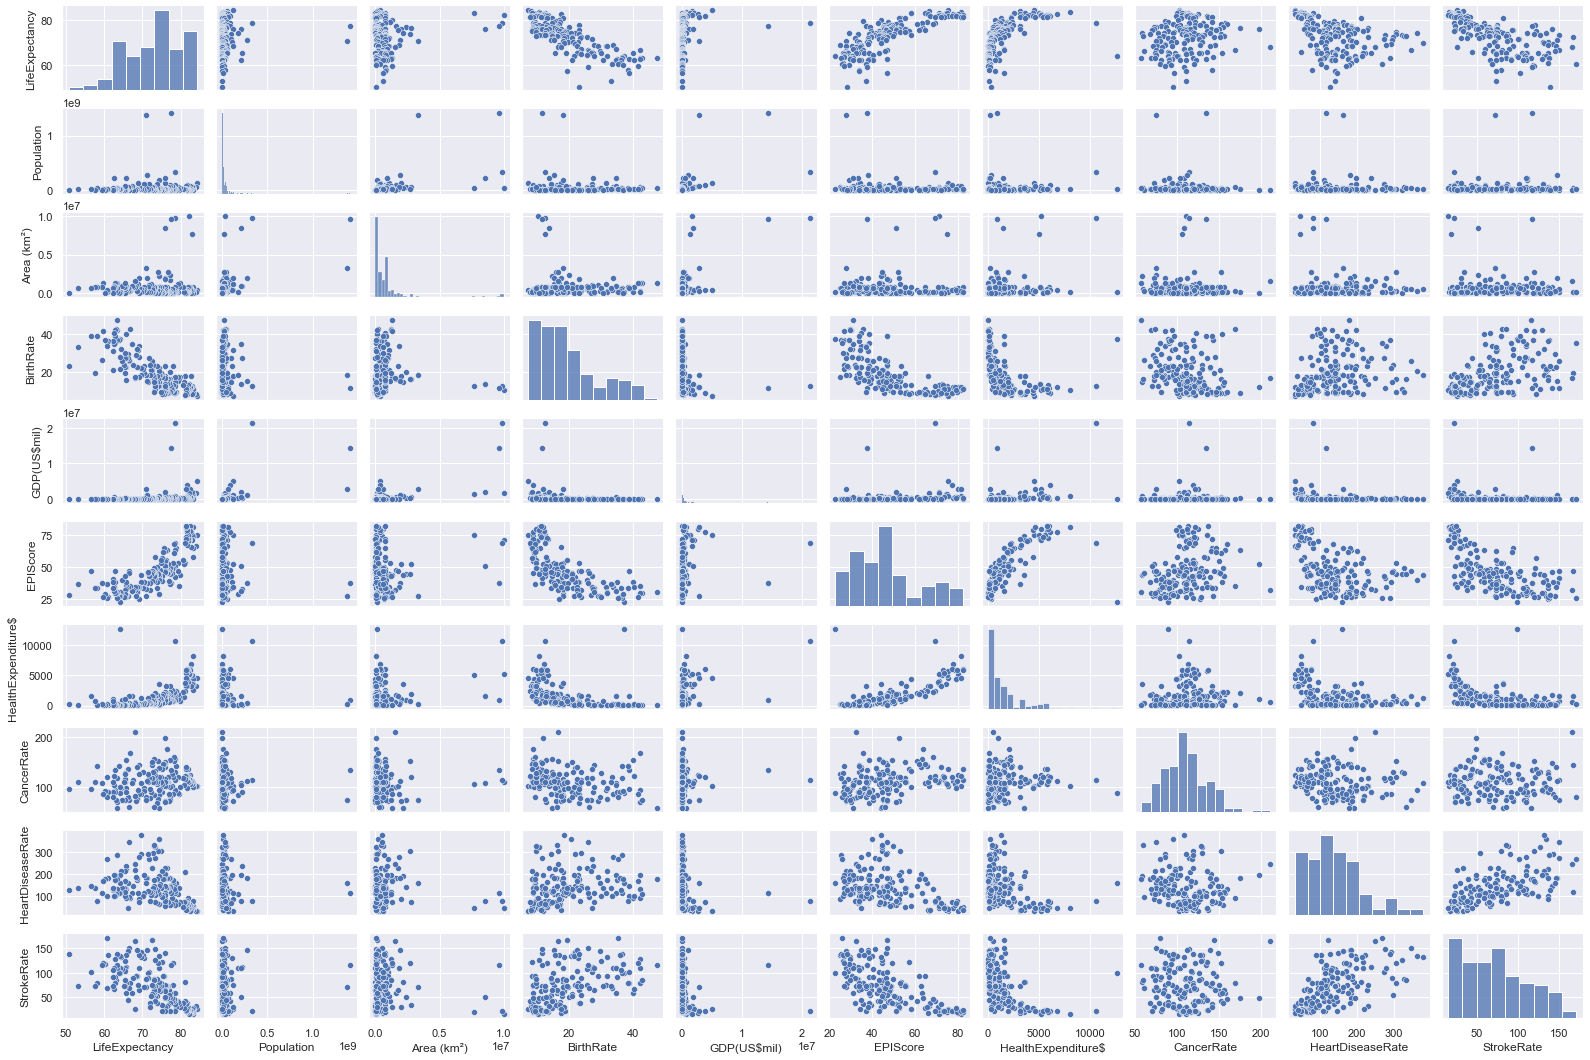

In [28]:
# Plot all of the variable-to-variable relations as scatterplots
# Note: there are outliers, and data points are concentrated on the left side (ie, right skewed)
sns.pairplot(df, height=1.5, aspect=1.5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             173 non-null    object 
 1   LifeExpectancy      173 non-null    float64
 2   Population          173 non-null    int64  
 3   Status              165 non-null    object 
 4   Area (km²)          173 non-null    float64
 5   BirthRate           173 non-null    float64
 6   GDP(US$mil)         173 non-null    int64  
 7   EPIScore            173 non-null    float64
 8   HealthExpenditure$  173 non-null    float64
 9   CancerRate          173 non-null    float64
 10  HeartDiseaseRate    173 non-null    float64
 11  StrokeRate          173 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 16.3+ KB


In [30]:
# slice data into features X and target y
X = df[ ['BirthRate', 'CancerRate', 'EPIScore', 'GDP(US$mil)', 'HealthExpenditure$',
         'HeartDiseaseRate', 'Population', 'Area (km²)', 'StrokeRate'] ].astype(float)
X = sm.add_constant(X)

y = df[ "LifeExpectancy" ].astype(float)    # y is a series
# y = df.loc[:,"Life Expectancy"].astype(float)   # alternate code, same outcome

# Baseline results - model / fit / summarize, lots of bad Pvalue>0.05
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     70.55
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.27e-51
Time:                        00:51:39   Log-Likelihood:                -448.41
No. Observations:                 173   AIC:                             916.8
Df Residuals:                     163   BIC:                             948.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 76.2951      2.386     31.979      0.000      71.584      81.006
BirthRate             -0.3635      0.038     -9.653      0.000      -0.438      -0.289
CancerRate            -0.0117      0.011     -1.096      0.275      -0.033       0.009
EPIScore               0.1485      0.033      4.456      0.000       0.083       0.214
GDP(US$mil)        -1.776e-07   1.97e-07     -0.903      0.368   -5.66e-07    2.11e-07
HealthExpenditure$     0.0002      0.000      0.944      0.347      -0.000       0.001
HeartDiseaseRate       0.0023      0.004      0.505      0.614      -0.007       0.011
Population          3.508e-09   2.18e-09      1.607      0.110   -8.04e-10    7.82e-09
Area (km²)          7.303e-08   2.22e-07      0.330      0.742   -3.65e-07    5.11e-07
StrokeRate            -0.0399      0.010     -3.851      0.000      -0.060      -0.019
==============================================================================
Omnibus:                       59.387   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.918
Skew:                          -1.372   Prob(JB):                     3.14e-40
Kurtosis:                       7.209   Cond. No.                     1.51e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Feature Selection

###### Drop feature one by one
Drop feature one by one to see its effect on R^2
  
R^2 will be lower when a significant feature has been dropped

In [31]:
## use "Ctrl-/" to include or remove each commenting
X = df[ ['BirthRate', 
         'CancerRate', 
         'EPIScore',
         'GDP(US$mil)', 
         'HealthExpenditure$',
         'HeartDiseaseRate', 
         'Population', 
         'Area (km²)'#, 
         #'StrokeRate'
        ] ].astype(float)
X = sm.add_constant(X)
y = df[ "LifeExpectancy" ].astype(float)    # y is a series

model = sm.OLS(y, X)
results = model.fit()
results.summary()
# original, all features included, R^2 = 0.796
# without Birth Rate, R^2 = 0.679 (=> significant feature)
# without Cancer Rate, R^2 = 0.794 
# without EPI, R^2 = 0.771 (=> significant feature)
# without GDP, R^2 = 0.795
# without Health Expenditure, R^2 =0.795
# without Heart Disease Rate, R^2 = 0.795
# without Population, R^2 = 0.792
# without Area, R^2 = 0.796
# without Stroke Rate, R^2 = 0.777 (=> significant feature)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     71.49
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.62e-49
Time:                        00:51:39   Log-Likelihood:                -455.94
No. Observations:                 173   AIC:                             929.9
Df Residuals:                     164   BIC:                             958.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 74.1670      2.417     30.688      0.000      69.395      78.939
BirthRate             -0.3857      0.039     -9.953      0.000      -0.462      -0.309
CancerRate            -0.0216      0.011     -1.999      0.047      -0.043      -0.000
EPIScore               0.1916      0.033      5.862      0.000       0.127       0.256
GDP(US$mil)        -2.137e-07   2.05e-07     -1.044      0.298   -6.18e-07     1.9e-07
HealthExpenditure$     0.0002      0.000      0.980      0.328      -0.000       0.001
HeartDiseaseRate      -0.0071      0.004     -1.788      0.076      -0.015       0.001
Population          3.146e-09   2.27e-09      1.385      0.168   -1.34e-09    7.63e-09
Area (km²)           1.12e-07    2.3e-07      0.486      0.628   -3.43e-07    5.67e-07
==============================================================================
Omnibus:                       60.749   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.570
Skew:                          -1.357   Prob(JB):                     8.45e-46
Kurtosis:                       7.629   Cond. No.                     1.47e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Remove outliers
To remove 11 outlier values.
Note that I did not remove the data row altogether, I replace each outlier value by the next highest value.
Outliers: Population, Area (km²) and GDP(US$mil)

In [32]:
# RUN THIS CELL ONLY ONCE, to replace each outlier value with the next highest value
# Do it in 2 steps: first replace max-value by null, then replace null by the new max-value

df['Population'].replace(df['Population'].max(), np.nan, inplace=True)  
df['Population'].replace(df['Population'].max(), np.nan, inplace=True)
df['Population'].replace(np.nan, df['Population'].max(), inplace=True)

df['Area (km²)'].replace(df['Area (km²)'].max(), np.nan, inplace=True)   
df['Area (km²)'].replace(df['Area (km²)'].max(), np.nan, inplace=True)   
df['Area (km²)'].replace(df['Area (km²)'].max(), np.nan, inplace=True)   
df['Area (km²)'].replace(df['Area (km²)'].max(), np.nan, inplace=True)   
df['Area (km²)'].replace(df['Area (km²)'].max(), np.nan, inplace=True)   
df['Area (km²)'].replace(np.nan, df['Area (km²)'].max(), inplace=True)

df['GDP(US$mil)'].replace(df['GDP(US$mil)'].max(), np.nan, inplace=True)  
df['GDP(US$mil)'].replace(df['GDP(US$mil)'].max(), np.nan, inplace=True)   
df['GDP(US$mil)'].replace(np.nan, df['GDP(US$mil)'].max(), inplace=True)

In [33]:
# check results after removing outliers (R^2 = 0.737)
# Pop Density becomes significant feature (P-value becomes < 0.05)
X = df[ ['BirthRate', 'CancerRate', 'EPIScore', 'GDP(US$mil)', 'HealthExpenditure$',
         'HeartDiseaseRate', 'Population', 'Area (km²)', 'StrokeRate'] ].astype(float)
X = sm.add_constant(X)

y = df[ "LifeExpectancy" ].astype(float)
model = sm.OLS(y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     70.78
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.03e-51
Time:                        00:51:39   Log-Likelihood:                -448.19
No. Observations:                 173   AIC:                             916.4
Df Residuals:                     163   BIC:                             947.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 76.2598      2.384     31.983      0.000      71.552      80.968
BirthRate             -0.3683      0.037     -9.853      0.000      -0.442      -0.294
CancerRate            -0.0119      0.011     -1.110      0.269      -0.033       0.009
EPIScore               0.1529      0.034      4.539      0.000       0.086       0.219
GDP(US$mil)        -4.242e-07    5.2e-07     -0.816      0.416   -1.45e-06    6.03e-07
HealthExpenditure$     0.0001      0.000      0.733      0.465      -0.000       0.001
HeartDiseaseRate       0.0019      0.005      0.425      0.671      -0.007       0.011
Population          1.144e-08   7.18e-09      1.592      0.113   -2.75e-09    2.56e-08
Area (km²)          3.303e-08   4.23e-07      0.078      0.938   -8.03e-07    8.69e-07
StrokeRate            -0.0405      0.010     -3.885      0.000      -0.061      -0.020
==============================================================================
Omnibus:                       57.127   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.854
Skew:                          -1.336   Prob(JB):                     5.86e-37
Kurtosis:                       7.001   Cond. No.                     6.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

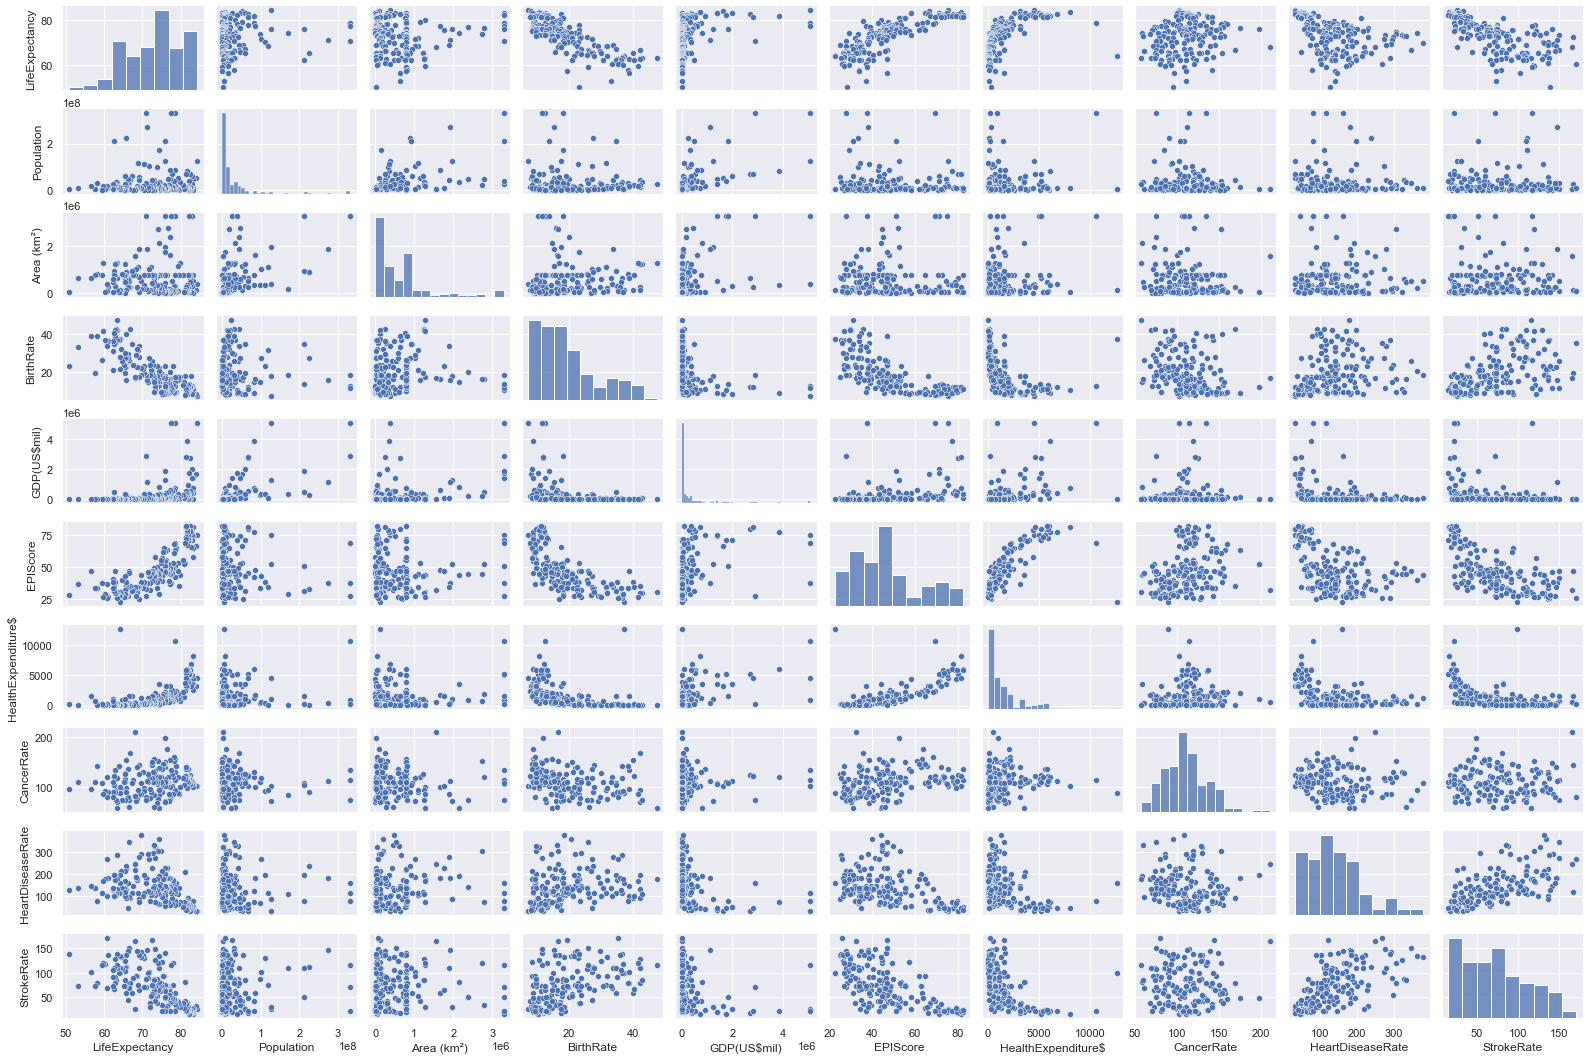

In [34]:
# Visualise pair plot after removing outliers
sns.pairplot(df, height=1.5, aspect=1.5)

###### Apply LOG function

In [35]:
df2=df1  # To retain the original data

In [36]:
# Apply LOG function to all 11 features

df1['BirthRate']         = np.log( df1['BirthRate'] )
df1['CancerRate']        = np.log( df1['CancerRate'] )
df1['EPIScore']          = np.log( df1['EPIScore'] )
df1['GDP(US$mil)']       = np.log( df1['GDP(US$mil)'] )     # becomes a significant feature
df1['HealthExpenditure$']= np.log( df1['HealthExpenditure$'] )
df1['HeartDiseaseRate']  = np.log( df1['HeartDiseaseRate'] )     # becomes a significant feature
df1['Population']        = np.log( df1['Population'] )     # becomes a significant feature
df1['Area (km²)']        = np.log( df1['Area (km²)'] )     # becomes a significant feature
df1['StrokeRate']        = np.log( df1['StrokeRate'] )

In [37]:
# check results after applying LOG (R^2 = 0.740)
X = df1[ ['BirthRate', 'CancerRate', 'EPIScore', 'GDP(US$mil)', 'HealthExpenditure$',
         'HeartDiseaseRate', 'Population', 'Area (km²)', 'StrokeRate'] ].astype(float)
X = sm.add_constant(X)

y = df1[ "LifeExpectancy" ].astype(float)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     74.97
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.51e-53
Time:                        00:51:56   Log-Likelihood:                -444.20
No. Observations:                 173   AIC:                             908.4
Df Residuals:                     163   BIC:                             939.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 83.9731     10.084      8.327      0.000      64.061     103.885
BirthRate             -5.9241      1.049     -5.647      0.000      -7.996      -3.852
CancerRate            -0.7556      1.208     -0.626      0.532      -3.140       1.629
EPIScore               4.0425      1.707      2.368      0.019       0.672       7.413
GDP(US$mil)            1.1040      0.420      2.630      0.009       0.275       1.933
HealthExpenditure$     0.1582      0.395      0.401      0.689      -0.621       0.938
HeartDiseaseRate       0.2506      0.648      0.387      0.700      -1.029       1.530
Population            -0.6264      0.404     -1.552      0.123      -1.423       0.171
Area (km²)            -0.0506      0.163     -0.310      0.757      -0.373       0.272
StrokeRate            -2.3445      0.768     -3.051      0.003      -3.862      -0.827
==============================================================================
Omnibus:                       40.489   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.888
Skew:                          -1.019   Prob(JB):                     6.76e-21
Kurtosis:                       5.956   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

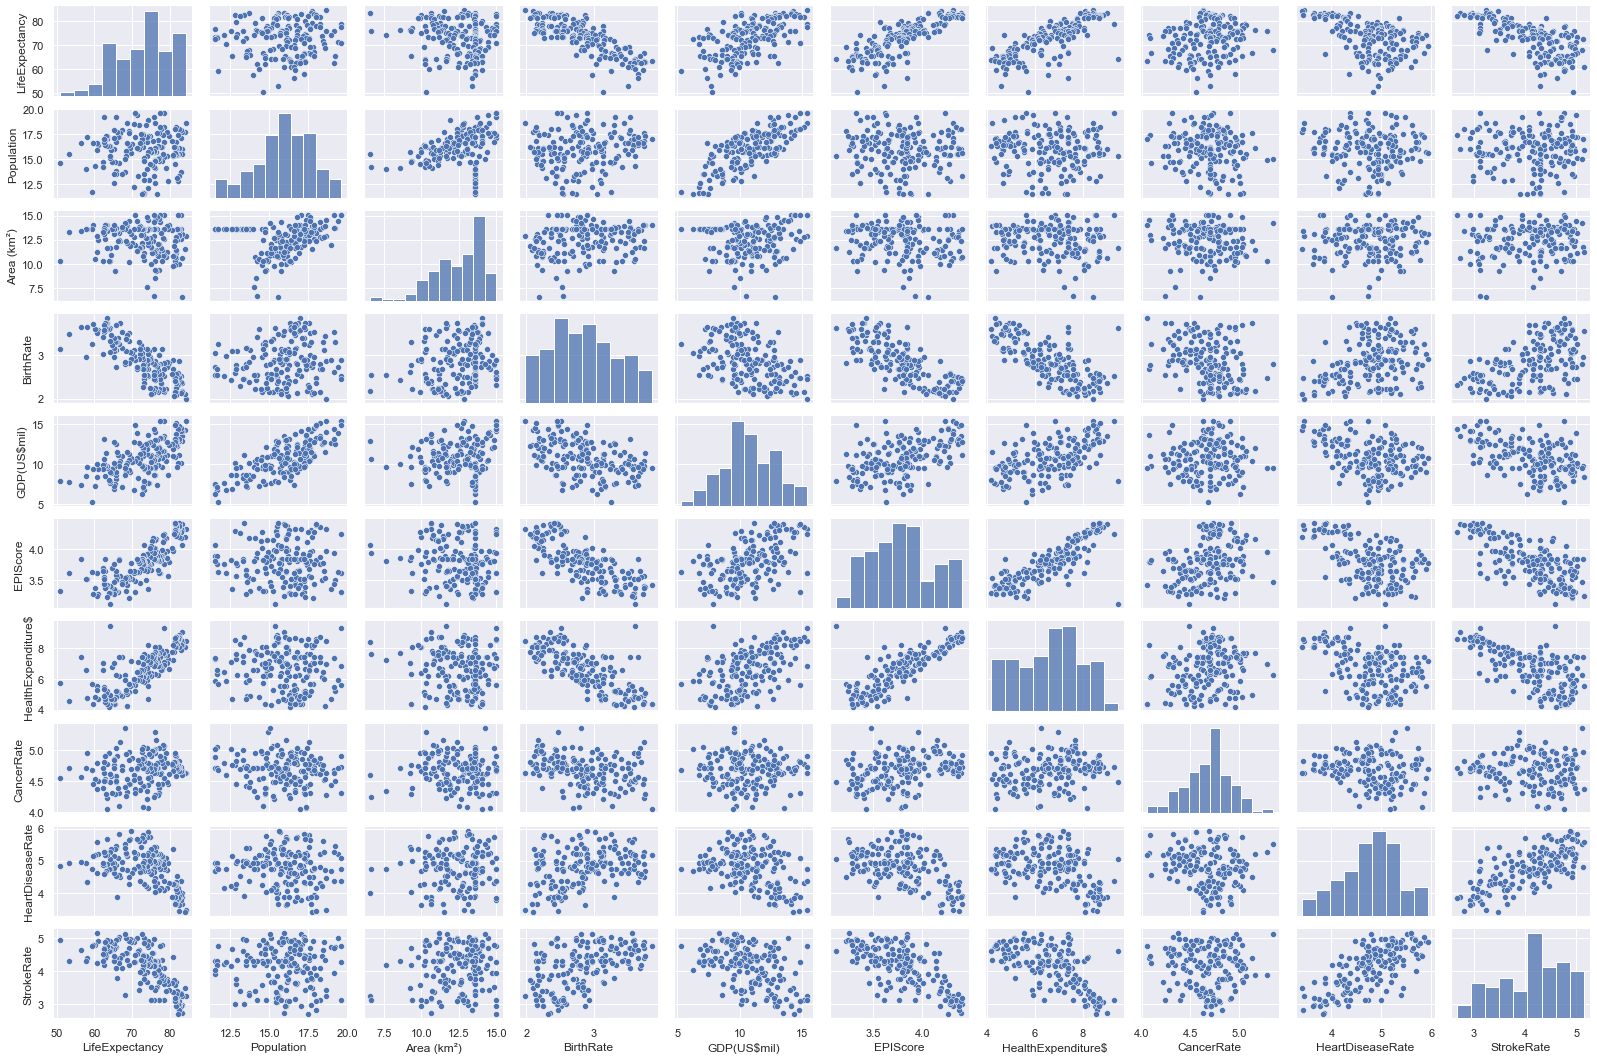

In [38]:
# Pair Plot with all 11 features
# Note: outliers have been removed using the LOG function alone
sns.pairplot(df, height=1.5, aspect=1.5)

###### outliers have been removed using the LOG function alone

##### Model Selection

###### Regression with Statsmodels

In [39]:
# Ordinary Least Squares Regression with Statsmodels, Option 1 (similar to R coding)

df2.drop(['Country','Status'], axis=1, inplace=True)
df2.columns = ['Y','X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']

#1a Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9', data=df2, return_type="dataframe")

#1b Create your model
model = sm.OLS(y, X)
#2 Fit your model to your training set
result = model.fit()
#3 Print summary statistics of the model's performance
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     74.97
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.51e-53
Time:                        00:52:14   Log-Likelihood:                -444.20
No. Observations:                 173   AIC:                             908.4
Df Residuals:                     163   BIC:                             939.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.9731     10.084      8.327      0.000      64.061     103.885
X1            -0.6264      0.404     -1.552      0.123      -1.423       0.171
X2            -0.0506      0.163     -0.310      0.757      -0.373       0.272
X3            -5.9241      1.049     -5.647      0.000      -7.996      -3.852
X4             1.1040      0.420      2.630      0.009       0.275       1.933
X5             4.0425      1.707      2.368      0.019       0.672       7.413
X6             0.1582      0.395      0.401      0.689      -0.621       0.938
X7            -0.7556      1.208     -0.626      0.532      -3.140       1.629
X8             0.2506      0.648      0.387      0.700      -1.029       1.530
X9            -2.3445      0.768     -3.051      0.003      -3.862      -0.827
==============================================================================
Omnibus:                       40.489   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.888
Skew:                          -1.019   Prob(JB):                     6.76e-21
Kurtosis:                       5.956   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Ordinary Least Squares Regression with Statsmodels, Option 2 (python method), same results as Option 1

#1 Define the model
model = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 ', data=df2)
#2 Fit the model
result = model.fit()
#3 Print summary statistics of the model's performance
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     74.97
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.51e-53
Time:                        00:52:15   Log-Likelihood:                -444.20
No. Observations:                 173   AIC:                             908.4
Df Residuals:                     163   BIC:                             939.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.9731     10.084      8.327      0.000      64.061     103.885
X1            -0.6264      0.404     -1.552      0.123      -1.423       0.171
X2            -0.0506      0.163     -0.310      0.757      -0.373       0.272
X3            -5.9241      1.049     -5.647      0.000      -7.996      -3.852
X4             1.1040      0.420      2.630      0.009       0.275       1.933
X5             4.0425      1.707      2.368      0.019       0.672       7.413
X6             0.1582      0.395      0.401      0.689      -0.621       0.938
X7            -0.7556      1.208     -0.626      0.532      -3.140       1.629
X8             0.2506      0.648      0.387      0.700      -1.029       1.530
X9            -2.3445      0.768     -3.051      0.003      -3.862      -0.827
==============================================================================
Omnibus:                       40.489   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.888
Skew:                          -1.019   Prob(JB):                     6.76e-21
Kurtosis:                       5.956   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Regression using SkLearn

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [42]:
# # Ordinary Least Squares Regression with sklearn

model = LinearRegression()
X = df2[ ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9'] ]
y = df2[ ['Y'] ]
# Fit the model to the full dataset
model.fit(X, y)
# Print out the R^2 for the model against the full dataset
print(model.score(X, y))
# print out intercept
print(model.intercept_)
# print out other coefficients
print(model.coef_)

0.8054341275870665
[83.97314966]
[[-0.62643471 -0.0506239  -5.92412589  1.10397773  4.04254301  0.15818797
  -0.75563796  0.25056546 -2.34446006]]


In [43]:
# hold out 20% of the data for validation, to find optimal alpha
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

# Mean Absolute Error (MAE) for validation
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

(138, 9)
(138, 1)
(35, 9)
(35, 1)


In [44]:
from sklearn.preprocessing import MinMaxScaler
## Use lassoCV to find the optimal ALPHA value for L1 regularization
# Scale the data as before
std = StandardScaler()
std.fit(X_train.values)
# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train)


lasso_model.alpha_ 


/Users/raghuveeryellapantula/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.11226677735108136

In [45]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, lasso_model.coef_))

[('X1', -0.3197090449792568),
 ('X2', -0.0),
 ('X3', -3.2629732741468387),
 ('X4', 1.3446388387159647),
 ('X5', 1.213721107640008),
 ('X6', 0.30707597468645853),
 ('X7', -0.17480402499196704),
 ('X8', -0.0),
 ('X9', -1.4537199926774267)]

In [46]:
# Make predictions on the validation set using the new model, and find the R^2
r2_score(y_val, lasso_model.predict(X_val_scaled))

0.7955296756356302

## Note: lars_path takes numpy matrices, not pandas dataframes
from sklearn.linear_model import lars_path
print("Computing regularization path using the LARS ...")
print(X_train_scaled.shape)
print(y_train.shape)
alphas, _, coefs = lars_path(X_train_scaled, y_train.values, method='lasso')

# plotting the LARS path
import matplotlib as plt
import matplotlib.pyplot as plt

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [47]:
## Use RidgeCV to find the optimal ALPHA value for L2 regularization
# Scale the data as before
std = StandardScaler()
std.fit(X_train.values)
# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train_scaled, y_train)
# This is the best alpha value found
ridge_model.alpha_
# 25.23539170434766 without LOG function
# 0.2097046401323233 after applying LOG function to all features

16.638168860761272

In [48]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

[('X1',
  array([-0.54806136, -0.08333846, -2.615922  ,  1.52499837,  1.24620108,
          0.79307324, -0.19473783, -0.12450545, -1.20568129]))]

In [49]:
np.mean(np.abs(ridge_model.predict(X_val_scaled) - y_val))

Y    2.358407
dtype: float64

In [50]:
# Make predictions on the validation set using the new model, and find the R^2
r2_score(y_val, ridge_model.predict(X_val_scaled))
# 0.6815718599477412 without LOG function
# 0.7001803890388709 after applying LOG function to all features

0.7958489384542704

In [51]:
## Use ElasticNetCV to find the optimal ALPHA value
# Scale the data as before
std = StandardScaler()
std.fit(X_train.values)
# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
elasticnet_model = ElasticNetCV(alphas = alphavec, cv=5)
elasticnet_model.fit(X_train_scaled, y_train)
# This is the best alpha value it found
elasticnet_model.alpha_
# 0.1956398343517063 without LOG function
# 0.0016257556664437934 after applying LOG function to all features

/Users/raghuveeryellapantula/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.1289890261253308

In [52]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

[('X1',
  array([-0.54806136, -0.08333846, -2.615922  ,  1.52499837,  1.24620108,
          0.79307324, -0.19473783, -0.12450545, -1.20568129]))]

In [53]:
# Make predictions on the validation set using the new model, and find the R^2
r2_score(y_val, elasticnet_model.predict(X_val_scaled))
# 0.681292482381891 without LOG function
# 0.7004421000497352 after applying LOG function to all features

0.797474186487088

###### Summary
Linear R^2: 0.8054341275870665
Ridge R^2: 0.7958489384542704
Lasso R^2: 0.7955296756356302
ElasticNet R^2: 0.797474186487088

Conclusion: Select simple linear regression model

In [54]:
## FINAL set of 8 features (Drop 3x features that are insignificant)
## use LOG function on all 8 features, outliers have been removed using the LOG function alone)
df_orig = pd.read_csv('orig.csv')
df_orig.head()

,Unnamed: 0,Country,LifeExpectancy,Population,Status,Area (km²),BirthRate,GDP(US$mil),EPIScore,HealthExpenditure$,CancerRate,HeartDiseaseRate,StrokeRate
0,0,JAPAN,84.3,126226568,Developed,377972.0,7.3,5082465,75.1,4504.0,102.84,31.55,25.76
1,1,SOUTH KOREA,84.0,51683025,NaN,100210.0,8.2,1646539,66.5,3214.0,102.53,30.29,32.37
2,2,SWITZERLAND,83.3,8680890,Developed,41285.0,10.5,731425,81.5,8114.0,102.46,47.47,15.26
3,3,SINGAPORE,83.2,5685807,Developed,721.5,8.9,372073,58.1,4439.0,99.90,54.67,25.53
4,4,SPAIN,83.2,47351567,Developed,505990.0,8.7,1393490,74.3,3576.0,107.58,38.88,19.39


In [55]:
X = df_orig[ ['Population', 'Area (km²)', 'BirthRate', 'GDP(US$mil)', 'EPIScore', 'HeartDiseaseRate', 'StrokeRate'] ].astype(float)
X = np.log(X)
y = df_orig[ "LifeExpectancy" ].astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     96.46
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           5.47e-55
Time:                        00:52:20   Log-Likelihood:                -445.00
No. Observations:                 173   AIC:                             906.0
Df Residuals:                     165   BIC:                             931.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               81.9124      8.887      9.217      0.000      64.366      99.459
Population          -0.6604      0.379     -1.743      0.083      -1.409       0.088
Area (km²)          -0.0736      0.158     -0.466      0.642      -0.385       0.238
BirthRate           -5.9024      0.999     -5.910      0.000      -7.874      -3.931
GDP(US$mil)          1.1554      0.389      2.974      0.003       0.388       1.923
EPIScore             4.0318      1.512      2.666      0.008       1.046       7.018
HeartDiseaseRate     0.3594      0.626      0.574      0.567      -0.877       1.595
StrokeRate          -2.5123      0.748     -3.359      0.001      -3.989      -1.035
==============================================================================
Omnibus:                       38.644   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.604
Skew:                          -0.986   Prob(JB):                     2.58e-19
Kurtosis:                       5.825   Cond. No.                         891.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
## to check R^2 score for all models with best alpha, using manual split (see below for R^2 using CV, more robust)
# hold out 20% of the data for validation 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(138, 8)
(138,)
(35, 8)
(35,)


In [57]:
#set up the 5 models for training & validation:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear regression val R^2: {lm.score(X_val, y_val):.3f}')

#Feature scaling for train/val data so that we can run our ridge/lasso/elasticnet model on each
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

lm_ridge = Ridge(alpha=0.2097046401323233)
lm_ridge.fit(X_train_scaled, y_train)
print(f'Ridge regression val R^2: {lm_ridge.score(X_val_scaled, y_val):.3f}')

lm_lasso = Lasso(alpha=0.0032550885998350564)
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')

lm_elasticnet = ElasticNet(alpha=0.0016257556664437934)
lm_elasticnet.fit(X_train_scaled, y_train)
print(f'ElasticNet regression val R^2: {lm_elasticnet.score(X_val_scaled, y_val):.3f}')

#Feature transforms for train/val data so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear regression val R^2: 0.791
Ridge regression val R^2: 0.791
Lasso regression val R^2: 0.791
ElasticNet regression val R^2: 0.791
Degree 2 polynomial regression val R^2: 0.585


In [58]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Feature transform/scaling so that we can run our ridge/lasso/elasticnet model 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
#Feature transform/scaling so that we can run our poly model 
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X.values)

kf = KFold(n_splits=5, shuffle=True, random_state = 1)

cvs_lm = cross_val_score(lm, X, y, cv=kf, scoring='r2')
print(cvs_lm)
print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3) )

cvs_ridge = cross_val_score(lm_ridge, X_scaled, y, cv=kf, scoring='r2')
print(cvs_ridge)
print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3) )

cvs_lasso = cross_val_score(lm_lasso, X_scaled, y, cv=kf, scoring='r2')
print(cvs_lasso)
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3) )

cvs_elasticnet = cross_val_score(lm_elasticnet, X_scaled, y, cv=kf, scoring='r2')
print(cvs_elasticnet)
print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3) )

cvs_poly = cross_val_score(lm_poly, X_poly, y, cv=kf, scoring='r2')
print(cvs_poly)
print('Degree 2 polynomial Regression cv R^2:', round(np.mean(cvs_poly),3), '+-', round(np.std(cvs_poly),3) )

[0.79115009 0.79977195 0.76190708 0.82391324 0.75055875]
Linear regression cv R^2: 0.785 +- 0.026
[0.79139712 0.80022385 0.76152447 0.82374999 0.75118715]
Ridge regression cv R^2: 0.786 +- 0.026
[0.79128037 0.80033789 0.76156451 0.82375267 0.75126539]
Lasso regression cv R^2: 0.786 +- 0.026
[0.79131607 0.80015786 0.76161711 0.82378543 0.75107553]
ElasticNet regression cv R^2: 0.786 +- 0.026
[0.61389015 0.47801329 0.67280826 0.8744999  0.67338096]
Degree 2 polynomial Regression cv R^2: 0.663 +- 0.128


In [59]:
## Evaluation on test dataset
# note: insufficient data, so test all models on global dataset X, y
X_test = X.copy()
y_test = y.copy()

lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear regression test R^2: {lm.score(X_test, y_test):.3f}')

#Feature scaling for test data so that we can run our ridge/lasso/elasticnet model on each
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

lm_ridge = Ridge(alpha=0.2097046401323233)
lm_ridge.fit(X_train_scaled, y_train)
print(f'Ridge regression test R^2: {lm_ridge.score(X_test_scaled, y_test):.3f}')

lm_lasso = Lasso(alpha=0.0032550885998350564)
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso regression test R^2: {lm_lasso.score(X_test_scaled, y_test):.3f}')

lm_elasticnet = ElasticNet(alpha=0.0016257556664437934)
lm_elasticnet.fit(X_train_scaled, y_train)
print(f'ElasticNet regression test R^2: {lm_elasticnet.score(X_test_scaled, y_test):.3f}')

#Feature transforms for test data so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')


cvs_lm = cross_val_score(lm, X_test, y_test, cv=kf, scoring='r2')
print(("Linear Regression test R^2:"),( cvs_lm))
print(("Linear Regression test mean R^:"), round(np.mean(cvs_lm),3), "+-", round(np.std(cvs_lm),3) )
cvs_ridge = cross_val_score(lm_ridge, X_test_scaled, y_test, cv=kf, scoring='r2')
print(('Ridge Regression test R^2:'), cvs_ridge)
print( ("Ridge Regression test mean R^:"), round(np.mean(cvs_ridge),3), "+-", round(np.std(cvs_ridge),3) )
cvs_lasso = cross_val_score(lm_lasso, X_test_scaled, y_test, cv=kf, scoring='r2')
print(('Lasso Regression test R^2:'),cvs_lasso)
print( ("Lasso Regression test mean R^:"), round(np.mean(cvs_lasso),3), "+-", round(np.std(cvs_lasso),3) )
cvs_poly = cross_val_score(lm_poly, X_test_poly, y_test, cv=kf, scoring='r2')
print(('Degree 2 polynomial regression test R^2:'),cvs_poly)
print( ('Degree 2 polynomial regression test mean R^2:'), round(np.mean(cvs_poly),3), "+-", round(np.std(cvs_poly),3) )


Linear regression test R^2: 0.803
Ridge regression test R^2: 0.803
Lasso regression test R^2: 0.803
ElasticNet regression test R^2: 0.803
Degree 2 polynomial regression test R^2: 0.804
Linear Regression test R^2: [0.79115009 0.79977195 0.76190708 0.82391324 0.75055875]
Linear Regression test mean R^: 0.785 +- 0.026
Ridge Regression test R^2: [0.79138335 0.80018888 0.76154483 0.82375373 0.75117559]
Ridge Regression test mean R^: 0.786 +- 0.026
Lasso Regression test R^2: [0.79127024 0.80032321 0.76159182 0.82375469 0.75125956]
Lasso Regression test mean R^: 0.786 +- 0.026
Degree 2 polynomial regression test R^2: [0.61389015 0.47801329 0.67280826 0.8744999  0.67338096]
Degree 2 polynomial regression test mean R^2: 0.663 +- 0.128


In [60]:
# why Degree 2 polynomial regression test R^2: 0.804 ?
print(X_train.shape)
print(X_test.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_poly.shape)
print(X_test_poly.shape)

(138, 8)
(173, 8)
(138, 8)
(173, 8)
(138, 45)
(173, 45)


##### Conclusion
Linear Regression is the chosen model.
Drop 2x features that are insignificant, and apply LOG function to ALL 7 features (LOG function can already take care of outliers)
R^2 = 0.803, and all 7 features have P-value < 0.05

In [61]:
df_fin = pd.read_csv('orig.csv')
df_fin.drop(columns=['Unnamed: 0','CancerRate', 'HealthExpenditure$','Status'], axis=1, inplace=True)
df_fin['Population']         = np.log( df_fin['Population'] )
df_fin['Area (km²)']               = np.log( df_fin['Area (km²)'] )
df_fin['BirthRate']         = np.log( df_fin['BirthRate'] )
df_fin['GDP(US$mil)']         = np.log( df_fin['GDP(US$mil)'] )
df_fin['EPIScore']          = np.log( df_fin['EPIScore'] )
df_fin['HeartDiseaseRate'] = np.log( df_fin['HeartDiseaseRate'] )
df_fin['StrokeRate']        = np.log( df_fin['StrokeRate'] )
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           173 non-null    object 
 1   LifeExpectancy    173 non-null    float64
 2   Population        173 non-null    float64
 3   Area (km²)        173 non-null    float64
 4   BirthRate         173 non-null    float64
 5   GDP(US$mil)       173 non-null    float64
 6   EPIScore          173 non-null    float64
 7   HeartDiseaseRate  173 non-null    float64
 8   StrokeRate        173 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.3+ KB


In [62]:
X, y = df_fin.drop(columns=['LifeExpectancy', 'Country'], axis=1), df_fin['LifeExpectancy']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     96.46
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           5.47e-55
Time:                        00:52:21   Log-Likelihood:                -445.00
No. Observations:                 173   AIC:                             906.0
Df Residuals:                     165   BIC:                             931.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               81.9124      8.887      9.217      0.000      64.366      99.459
Population          -0.6604      0.379     -1.743      0.083      -1.409       0.088
Area (km²)          -0.0736      0.158     -0.466      0.642      -0.385       0.238
BirthRate           -5.9024      0.999     -5.910      0.000      -7.874      -3.931
GDP(US$mil)          1.1554      0.389      2.974      0.003       0.388       1.923
EPIScore             4.0318      1.512      2.666      0.008       1.046       7.018
HeartDiseaseRate     0.3594      0.626      0.574      0.567      -0.877       1.595
StrokeRate          -2.5123      0.748     -3.359      0.001      -3.989      -1.035
==============================================================================
Omnibus:                       38.644   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.604
Skew:                          -0.986   Prob(JB):                     2.58e-19
Kurtosis:                       5.825   Cond. No.                         891.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Model Interpretation

If your country has low birth rate, add 6 more years to your life.
If the EPI (Environment Performance Index) is high, add 4 more years to your life.
If you live in a rich country, add a year to your life.
Finally for every unit (or rather LOG unit) decrease in stroke rate, 2 and half more years could be added to your life.


<AxesSubplot:>

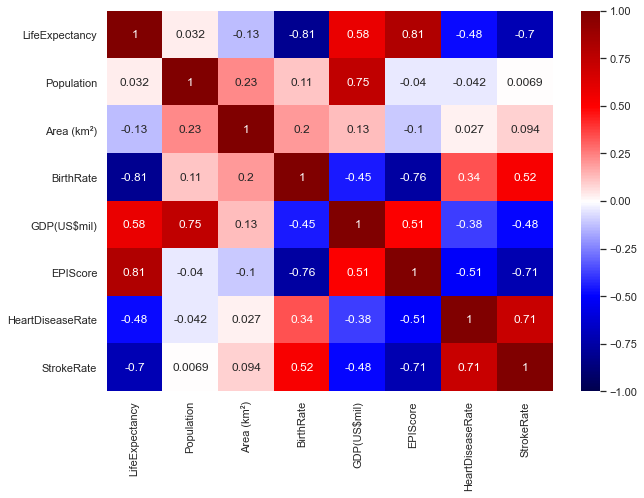

In [63]:
# Visualizing correlation with Seaborn, only FINAL 7 significant features
# Note feature correlation < 0.7
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df_fin.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)


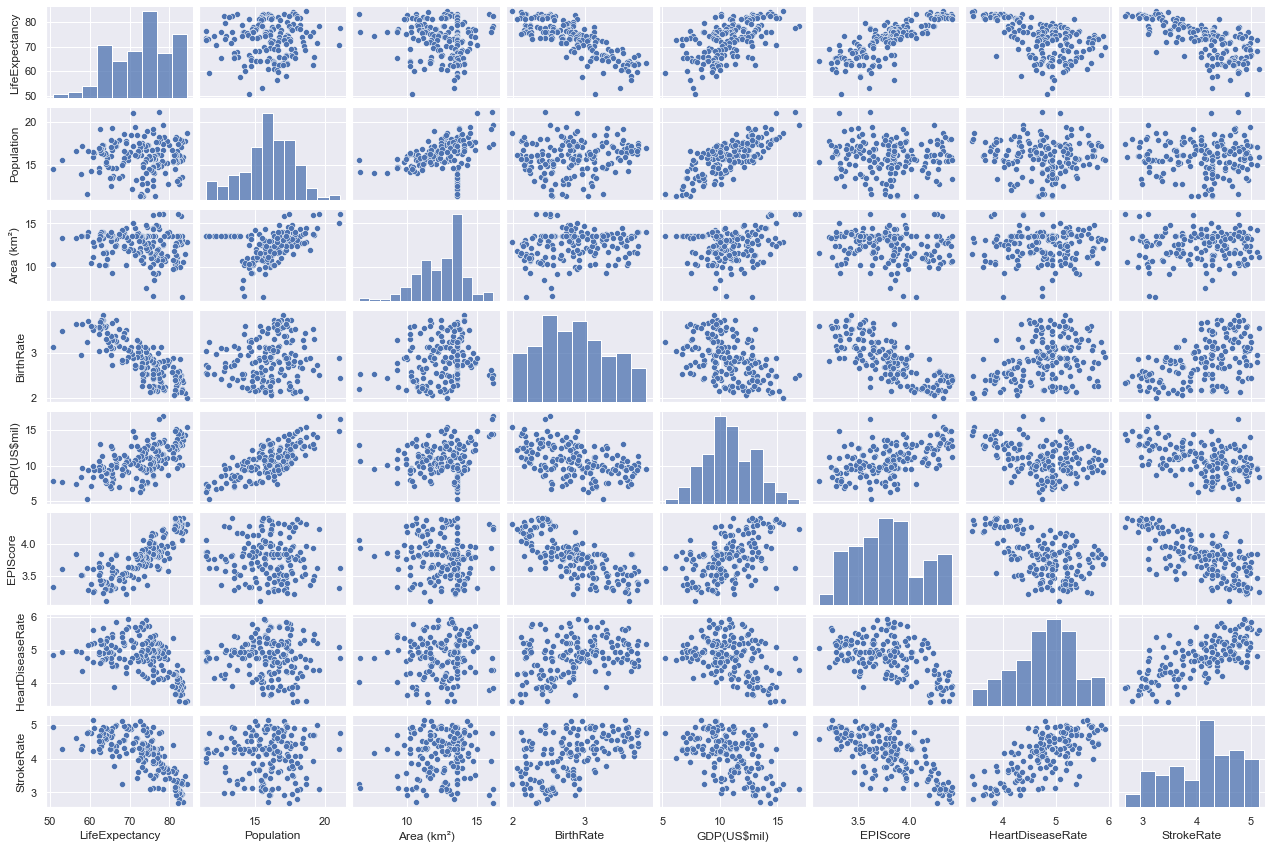

In [64]:
# Pair Plot with FINAL 8 significant features
# Note: outliers have been removed using the LOG function alone
sns.pairplot(df_fin, height=1.5, aspect=1.5)

Text(0, 0.5, 'residuals')

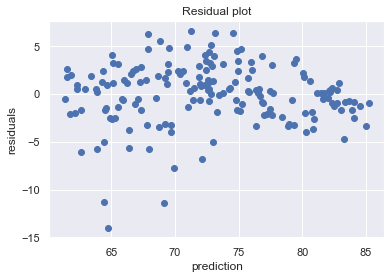

In [65]:
# Plot the residuals 
plt.figure(figsize=(6,4))
plt.scatter(results.predict(), results.resid)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

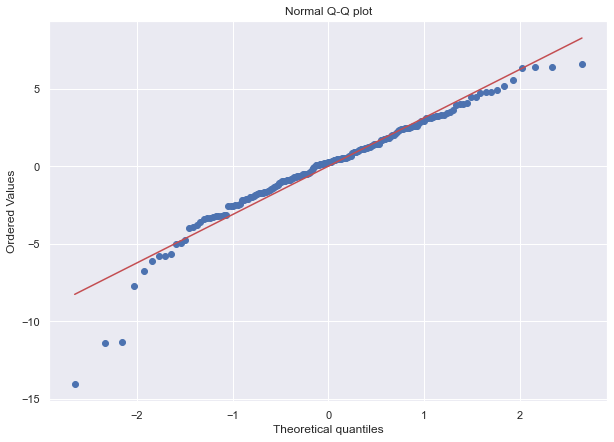

<Figure size 576x576 with 0 Axes>

In [66]:
# Normal Q-Q Plot
import scipy.stats as stats

# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y) # for later use
# Plot your predicted values on the x-axis, and your residuals on the y-axis
df_fin['predict'] = fit.predict(X)
df_fin['resid'] = y - df_fin.predict
# diagnose/inspect residual normality using qqplot:
stats.probplot(df_fin['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.figure(figsize=(8,8))
plt.show()

In [67]:
# Additional Study
df = pd.read_csv('final.csv')

In [68]:
## try database without null fields (remove entire row)
df = df.dropna(how = 'any') 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 172
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             127 non-null    object 
 1   LifeExpectancy      127 non-null    float64
 2   Population          127 non-null    int64  
 3   Status              127 non-null    object 
 4   Area (km²)          127 non-null    float64
 5   BirthRate           127 non-null    float64
 6   GDP(US$mil)         127 non-null    int64  
 7   EPIScore            127 non-null    float64
 8   HealthExpenditure$  127 non-null    float64
 9   CancerRate          127 non-null    float64
 10  HeartDiseaseRate    127 non-null    float64
 11  StrokeRate          127 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 12.9+ KB


In [69]:
X, y = df.drop(columns=['LifeExpectancy', 'Country','Status'], axis=1), df['LifeExpectancy']
X = np.log(X)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     68.29
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.21e-42
Time:                        00:52:34   Log-Likelihood:                -313.72
No. Observations:                 127   AIC:                             647.4
Df Residuals:                     117   BIC:                             675.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 73.9552     13.349      5.540      0.000      47.518     100.392
Population             0.3779      0.618      0.611      0.542      -0.846       1.602
Area (km²)            -0.3048      0.222     -1.376      0.171      -0.744       0.134
BirthRate             -5.5390      1.117     -4.961      0.000      -7.750      -3.328
GDP(US$mil)            0.4132      0.565      0.732      0.466      -0.705       1.532
EPIScore               5.5182      1.993      2.769      0.007       1.571       9.466
HealthExpenditure$     0.3571      0.502      0.711      0.478      -0.637       1.351
CancerRate            -1.4116      1.217     -1.160      0.248      -3.821       0.998
HeartDiseaseRate       0.4510      0.702      0.642      0.522      -0.939       1.841
StrokeRate            -2.7275      0.874     -3.121      0.002      -4.458      -0.997
==============================================================================
Omnibus:                       32.408   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.141
Skew:                          -0.914   Prob(JB):                     3.61e-21
Kurtosis:                       6.801   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residuals')

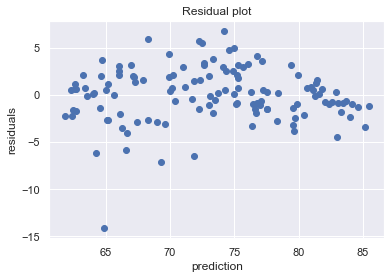

In [70]:
# Plot the residuals (without null fields, only 136 rows of data)
plt.figure(figsize=(6,4))
plt.scatter(results.predict(), results.resid)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

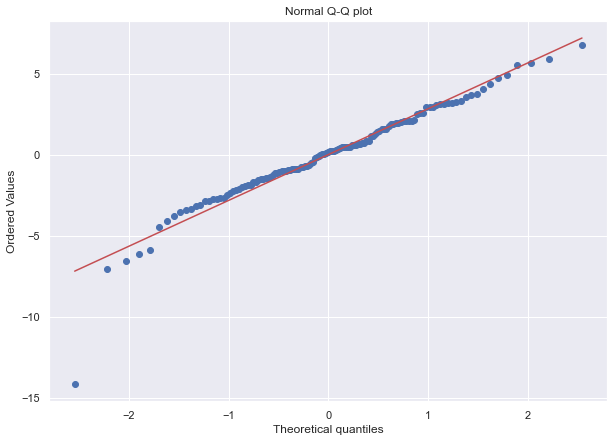

<Figure size 576x576 with 0 Axes>

In [71]:
# Normal Q-Q Plot
import scipy.stats as stats

# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y) # for later use
# Plot your predicted values on the x-axis, and your residuals on the y-axis
df['predict'] = fit.predict(X)
df['resid'] = y - df.predict
# diagnose/inspect residual normality using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.figure(figsize=(8,8))
plt.show()